<a href="https://colab.research.google.com/github/Syilun/TibameAI04/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


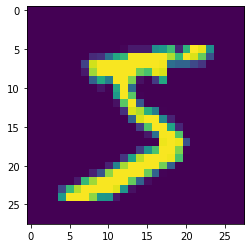

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print('ans:', y_train[idx])
plt.imshow(x_train[idx])

In [5]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [    # 784 * 128 + 128(bias) = 100480 預先搬回原點
          Dense(128, activation='relu', input_dim=784),
          # 128 * 10 + 10(bias) = 1290
          Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:

x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
x_train_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

# 梯度下降的次數 54000/200=270
# loss: cross-entropy
# val: validation
# loss, accuracy: 54000/val_loss, val_accuracy: 6000
# 看validation的loss: val_loss
# 回報函數庫: callbacks
# 在每個訓練期之後保存模型: ModelCheckpoint
# EarlyStopping: 都沒有變好就停下來。


Epoch 1/50
270/270 - 1s - loss: 0.4368 - accuracy: 0.8809 - val_loss: 0.1965 - val_accuracy: 0.9487
Epoch 2/50
270/270 - 1s - loss: 0.2066 - accuracy: 0.9416 - val_loss: 0.1456 - val_accuracy: 0.9602
Epoch 3/50
270/270 - 1s - loss: 0.1544 - accuracy: 0.9557 - val_loss: 0.1201 - val_accuracy: 0.9663
Epoch 4/50
270/270 - 1s - loss: 0.1244 - accuracy: 0.9646 - val_loss: 0.1059 - val_accuracy: 0.9720
Epoch 5/50
270/270 - 1s - loss: 0.1017 - accuracy: 0.9709 - val_loss: 0.0974 - val_accuracy: 0.9717
Epoch 6/50
270/270 - 1s - loss: 0.0859 - accuracy: 0.9755 - val_loss: 0.0870 - val_accuracy: 0.9777
Epoch 7/50
270/270 - 1s - loss: 0.0729 - accuracy: 0.9801 - val_loss: 0.0909 - val_accuracy: 0.9732
Epoch 8/50
270/270 - 1s - loss: 0.0631 - accuracy: 0.9819 - val_loss: 0.0826 - val_accuracy: 0.9770
Epoch 9/50
270/270 - 1s - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.0787 - val_accuracy: 0.9767
Epoch 10/50
270/270 - 1s - loss: 0.0481 - accuracy: 0.9865 - val_loss: 0.0795 - val_accuracy: 0.9760

In [12]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9783


[0.07695715874433517, 0.9782999753952026]

In [13]:
# 因為loss那些已經都存好了，所以不需要再compile
# 可以load已經訓練好的model

# model.save("mnist.h5")
# HDFView
from tensorflow.keras.models import load_model
loaded = load_model("mnist.h5")
# 不需要:compile 可以: fit/evaluate/predict
loaded.evaluate(x_test_norm, y_test_cat)

# Tensorflow 都代轉換過後的
# sklearn 都代轉換之前的

313/313 [==============================] - 0s 997us/step - loss: 0.0770 - accuracy: 0.9783


[0.07695715874433517, 0.9782999753952026]

In [14]:

# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(i) for i in range(10)],
       columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),968,0,1,0,1,1,3,2,2,2
1(真實),0,1125,3,0,0,1,2,1,3,0
2(真實),4,4,1001,1,1,0,2,7,10,2
3(真實),0,1,0,981,1,6,2,4,8,7
4(真實),0,0,1,1,965,0,7,2,2,4
5(真實),1,0,0,6,2,868,6,2,4,3
6(真實),4,2,0,1,3,4,942,0,2,0
7(真實),0,2,10,1,1,0,0,1007,3,4
8(真實),4,0,3,2,4,3,3,3,949,3
9(真實),3,3,0,3,12,2,0,6,3,977


In [17]:
# 為了看有多少預測不對
# np.nonzero: 找到非零值的位置
import numpy as np
#a是1維陣列
a = [0,2,3]
b = np.nonzero(a)
print(np.array(b).ndim)
print(b)

2
(array([1, 2]),)


In [18]:
#a是2維陣列
a = np.array([[0,0,3],[0,0,0],[0,0,9]])
b = np.nonzero(a)
print(np.array(b).ndim)
print(b)
print(np.transpose(np.nonzero(a)))

2
(array([0, 2]), array([2, 2]))
[[0 2]
 [2 2]]


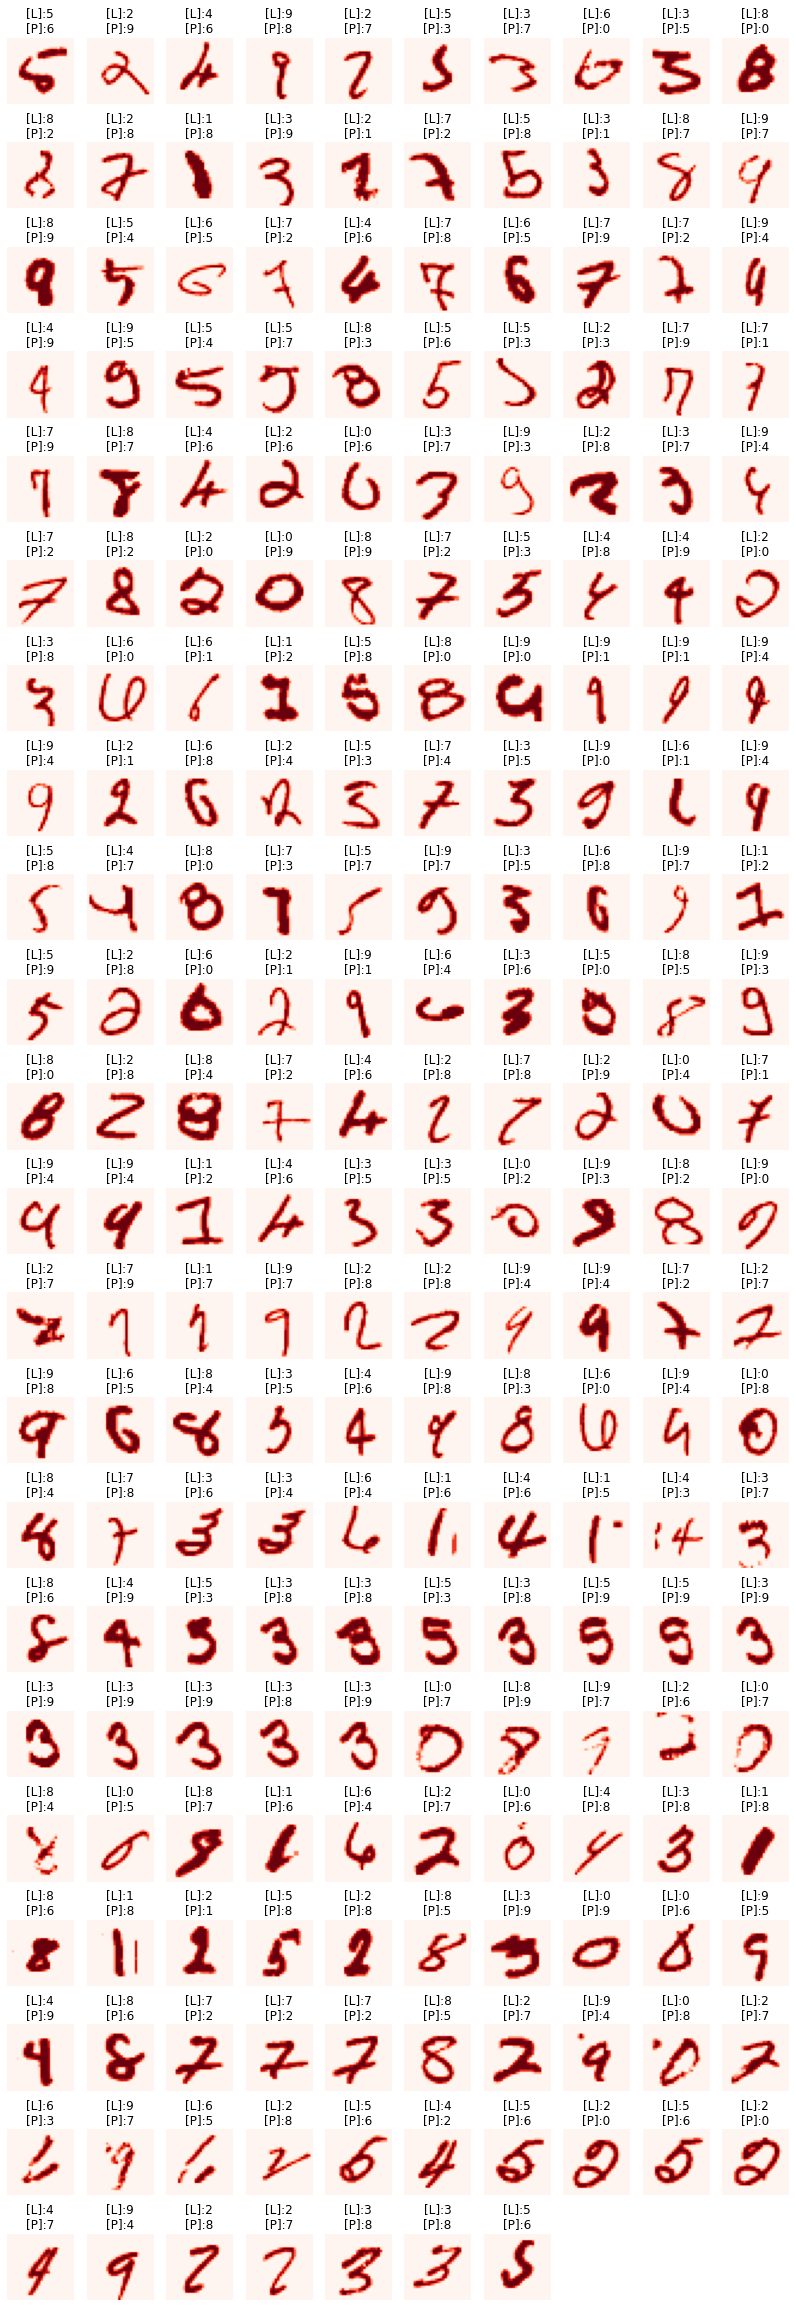

In [19]:
# figsize=(width, height) (unit=inches)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Reds")

In [21]:
idx = np.nonzero(pre != y_test)
idx

(array([   8,  149,  247,  320,  321,  340,  381,  445,  449,  495,  582,
         583,  619,  628,  659,  684,  720,  795,  844,  882,  947,  951,
        1014, 1039, 1112, 1156, 1182, 1194, 1226, 1232, 1242, 1247, 1272,
        1299, 1319, 1378, 1393, 1395, 1494, 1500, 1522, 1530, 1549, 1609,
        1621, 1681, 1709, 1790, 1828, 1901, 1941, 1955, 1984, 1987, 2004,
        2016, 2035, 2043, 2053, 2098, 2109, 2118, 2135, 2182, 2224, 2272,
        2293, 2387, 2406, 2414, 2426, 2433, 2454, 2488, 2597, 2607, 2618,
        2648, 2654, 2720, 2743, 2836, 2896, 2915, 2930, 2939, 2953, 2995,
        3060, 3073, 3117, 3330, 3422, 3474, 3503, 3520, 3549, 3558, 3567,
        3597, 3662, 3681, 3727, 3751, 3780, 3796, 3808, 3811, 3818, 3838,
        3850, 3869, 3906, 3941, 3943, 3995, 4065, 4078, 4140, 4163, 4176,
        4199, 4201, 4224, 4248, 4289, 4369, 4425, 4433, 4504, 4534, 4536,
        4601, 4740, 4751, 4761, 4807, 4814, 4823, 4880, 4956, 4966, 5078,
        5140, 5199, 5331, 5409, 5642, 

檔名:4.png
0 的機率: 0.0
1 的機率: 0.0
2 的機率: 0.0
3 的機率: 0.0
4 的機率: 0.0
5 的機率: 0.0
6 的機率: 0.0
7 的機率: 0.76
8 的機率: 0.01
9 的機率: 0.23


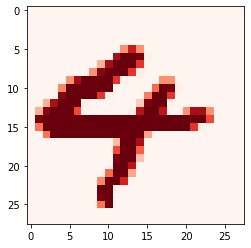

In [34]:
from tensorflow.keras.preprocessing.image import load_img
fn = input('檔名:')
img = load_img(fn, target_size=(28, 28)).convert('L')
img_np = np.array(img).reshape(1, 784) / 255 # 一批一批進來的所以一定要1, 784
pre = model.predict(img_np)[0]
for i in range(10):
    print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")